## Imports

In [1]:
#%% Imports.

import numpy as np
import ardent
import torch
import matplotlib
%matplotlib inline

/home/dcrowley/env/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Load data

In [2]:
directory_path = './demo_data/'
atlas_image_file_name = 'average_template_100.nrrd'
target_image_file_name = 'thy1eyfp_preprocessed_100um.vtk'

atlas_file_name = directory_path + atlas_image_file_name
target_file_name = directory_path + target_image_file_name

atlas = ardent.load(atlas_file_name)
target = ardent.load(target_file_name)

atlas = ardent.basic_preprocessing(atlas)
target = ardent.basic_preprocessing(target)

# Visualize before registration

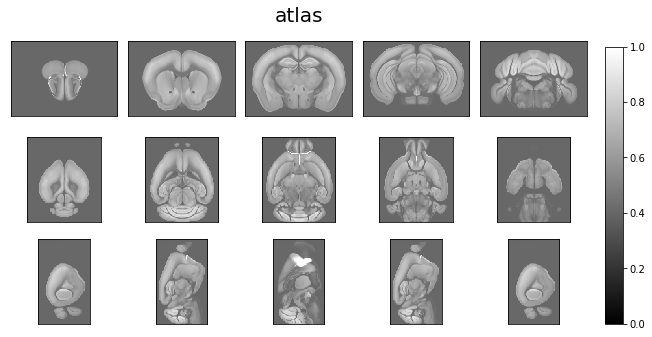

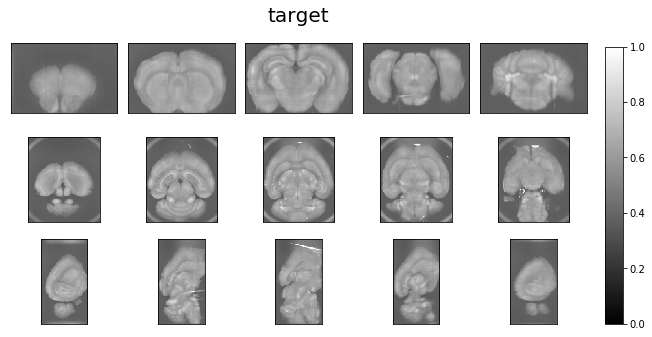

In [3]:
ardent.heatslices(atlas, title='atlas', limit_mode='stdev')
ardent.heatslices(target, title='target', limit_mode='stdev')

# Learn the transform from atlas to target

In [4]:
# The empty_cache function allows the register method to be run multiple times without overflowing the GPU memory.
# Sometimes you may have to pull up your terminal and enter 'nvidia-smi' and then kill whatever processes are running.
torch.cuda.empty_cache()

# Instantiate Transform object.
transform = ardent.Transform()

# The default is naffine=50 affine-only iterations and niter=200 total iterations.
# This should take approximately 1 minute depending on the GPU, and considerably more on CPU.
transform.register(template=atlas, target=target, preset='clarity, mouse')

Completed iteration 0, E=294372.31595898117, EM=294372.31595898117, ER=0.0
Completed iteration 10, E=249416.93264834717, EM=249416.93264834717, ER=0.0
Completed iteration 20, E=226986.77420530835, EM=226986.77420530835, ER=0.0
Completed iteration 30, E=215029.7234413809, EM=215029.7234413809, ER=0.0
Completed iteration 40, E=208783.94431836234, EM=208783.94431836234, ER=0.0
Completed iteration 50, E=204772.12280376122, EM=204772.12280376122, ER=0.0
Completed iteration 60, E=170353.9101716097, EM=169580.21811793034, ER=773.692053679351
Completed iteration 70, E=152812.47927903736, EM=150622.31180359086, ER=2190.167475446515
Completed iteration 80, E=143603.22246875646, EM=139990.3335099718, ER=3612.888958784676
Completed iteration 90, E=137845.5067285325, EM=132952.0290845377, ER=4893.4776439947955
Completed iteration 100, E=134113.90921035068, EM=128085.51435211289, ER=6028.394858237799
Completed iteration 110, E=131457.1477932438, EM=124404.84257583768, ER=7052.305217406138
Completed 

# Apply the transform

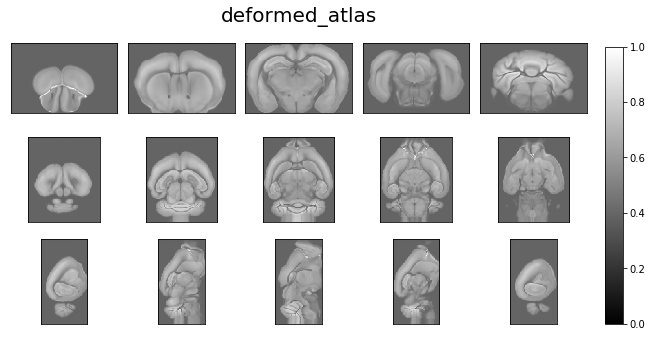

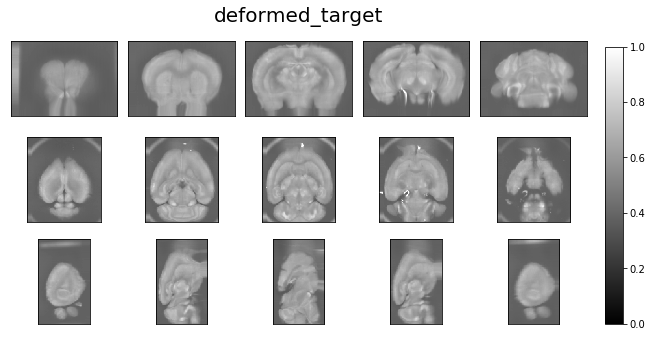

In [6]:
deformed_atlas = transform.apply_transform(subject=atlas, deform_to='target')
deformed_target = transform.apply_transform(subject=target, deform_to='template')

ardent.heatslices(deformed_atlas, title='deformed_atlas', limit_mode='stdev')
ardent.heatslices(deformed_target, title='deformed_target', limit_mode='stdev')

# Visualize after registration

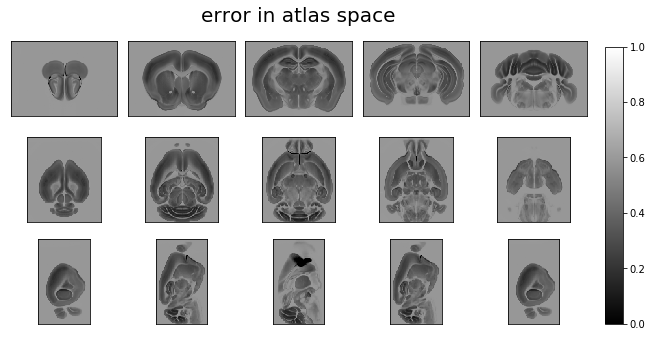

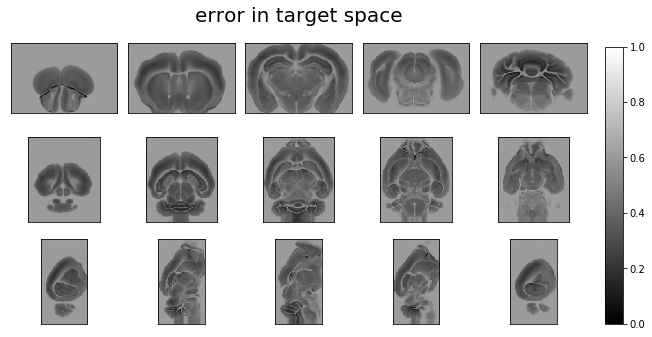

In [7]:
# To simply visualize error we plot the difference between images.
ardent.heatslices(deformed_target - atlas, title='error in atlas space', limit_mode='stdev')
ardent.heatslices(target - deformed_atlas, title='error in target space', limit_mode='stdev')

# Again but with color!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

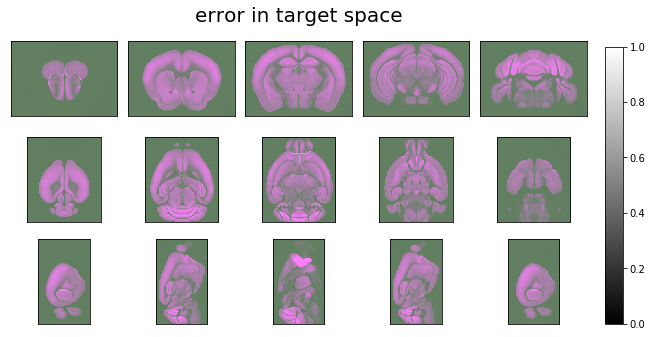

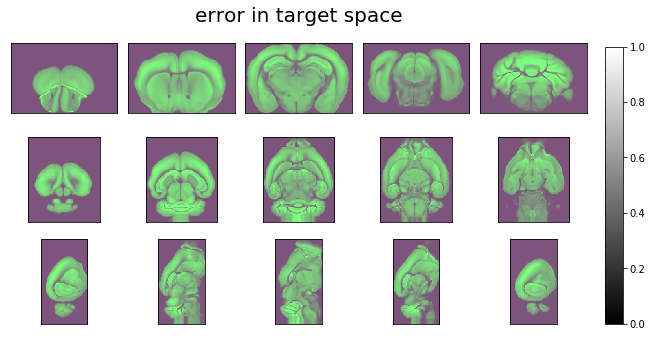

In [8]:
ardent.heatslices(np.stack([atlas, deformed_target, atlas], axis=-1), title='error in target space', limit_mode='stdev')
ardent.heatslices(np.stack([target, deformed_atlas, target], axis=-1), title='error in target space', limit_mode='stdev')